## Finite Difference For Parabolic Problems


In [1]:
%matplotlib inline

In [2]:
import sys
sys.path.append('../../Py/Build')
from suite import *
sys.path.append('../../Py/GUI')
from suiteGUI import *
from math import exp

from matplotlib import animation, rc
from IPython.display import HTML

### Example 1

Here we show how to solve the following elliptic ordinary differential equation:
$$\begin{cases}\partial_t u - \partial^2_x u = 0\\u(-1)=0\;\;u(1)=0\\
u(x,0) = u_0(x)\end{cases}$$

we first define the 1D geometry where we are going to solve the problem, then we generate a uniform mesh for the finite difference scheme.

In [3]:
I = line(-1.0,1.0)
mesh = Mesh(1);
mesh.UniformMesh(I,0.25)

we now define the initial data over the above constructed mesh, and draw it,
$$u_0(x) = (x^2-1)$$

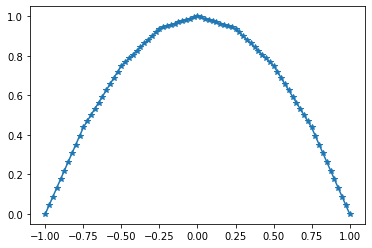

In [4]:
u0 = MeshFunction(mesh,1)
u0.pushFunction(lambda P: [(-P[0]**2+1)])
u0_vec = u0.vec_export()
Draw(u0,mesh,1)

We then create an spatial approximation of the Laplace operator with Dirichlet boundary conditions and use this to generate the stiffness matrix $K$, then we construct the mass matrix $M$.

In [5]:
bc = BoundaryCondition("DIRICHLET",u0)
FD = FiniteDifference(mesh)
K = FD.LaplaceOp(bc)+FD.BoundaryOp(bc);
M = spmat(K.Width(),K.Height())

Now we use the forward Euler method to solve the systems of ODEs represented by the following same discrete equations:
$$M\vec{U}'(t)-K\vec{U}(t) = 0$$

In [6]:
DiffEq = LinearODEs(1);
DiffEq.setDomain(0,4.0)
DiffEq

ODE of 1-th order defined on the interval (0.000000,4.000000)

In [7]:
DiffEq.setCoeff(0,lambda t : (-1)*K)
DiffEq.setCoeff(1,lambda t : M)
DiffEq.setIC(u0_vec)
u0_vec

(0.000000,0.437500,0.750000,0.937500,1.000000,0.937500,0.750000,0.437500,0.000000)

In [8]:
[H, u] = DiffEq.Euler(0.01)

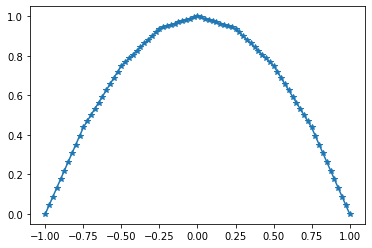

In [9]:
ut = MeshFunction(mesh,1)
ut.pushFunction(lambda P: [0])
ut.vec_import(u[0])
Draw(ut,mesh,1)

In [10]:
u[-1]

(0.000000,0.000021,0.000039,0.000051,0.000055,0.000051,0.000039,0.000021,0.000000)

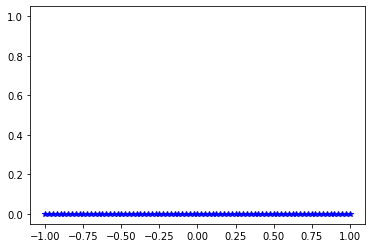

In [11]:
fig = plt.figure()
ims = []
for i in range(len(H)):
    ut.vec_import(u[i])
    ims.append(Figure(ut,mesh,1,"b*-"))

anim = animation.ArtistAnimation(fig, ims, interval=20, blit=True,
                                repeat_delay=1000);
HTML(anim.to_html5_video())